In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")


In [13]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,38.0,4,91.0,67,1995,16.2,38
1,24.0,4,134.0,96,2702,13.5,45
2,38.0,4,91.0,67,1965,15.0,38
3,24.0,4,140.0,92,2865,16.4,38
4,20.5,6,231.0,105,3425,16.9,43


In [14]:
result_dict = {}

In [24]:
def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }     

In [25]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [26]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6866836211757283
Test_score :  0.7046089053439712


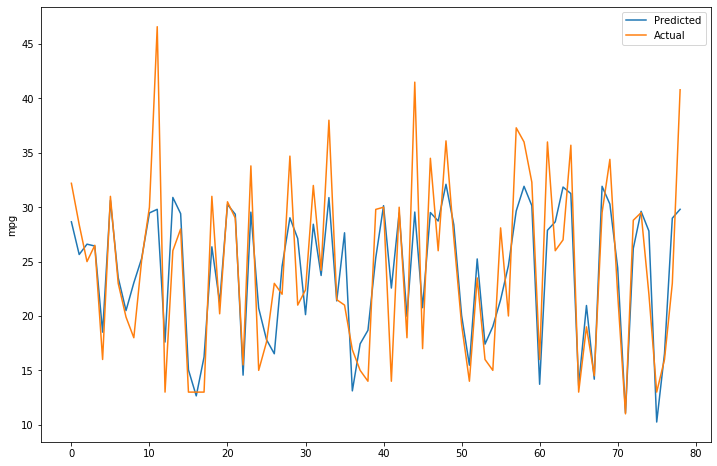

In [27]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                 ['weight'],
                                                   automobile_df,
                                                   show_plot_Y=True)

Training_score :  0.7314423062251066
Test_score :  0.5957505428361985


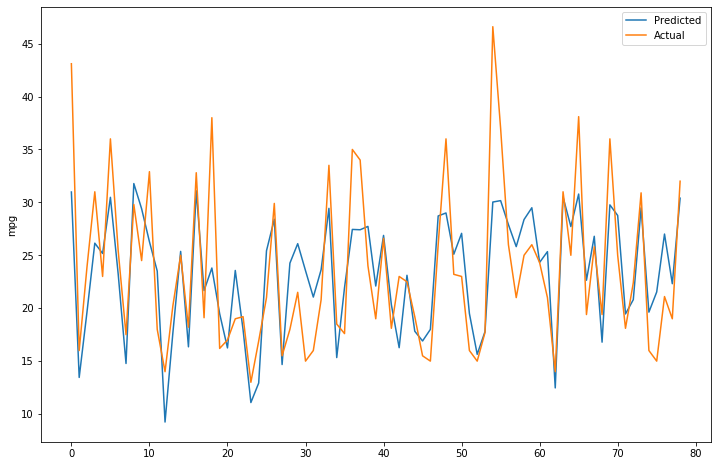

In [28]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                       'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

Training_score :  0.6935420394527554
Test_score :  0.7411313218650326


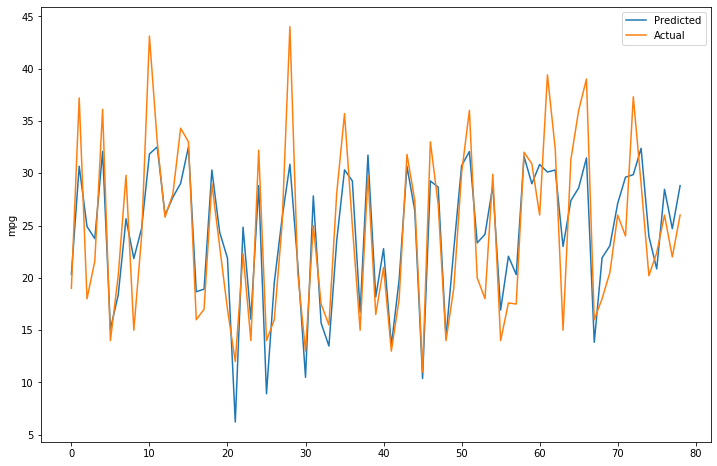

In [29]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                       'mpg',
                                                      ['horsepower',
                                                       'weight'],
                                                       automobile_df,
                                                       show_plot_Y=True)
                                                       
                                                       

In [30]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6866836211757283
Test score 0.7046089053439712

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7314423062251066
Test score 0.5957505428361985

Regression:  mpg ~ parsimonius_linear
Training score 0.6935420394527554
Test score 0.7411313218650326



In [31]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6869714262562083
Test_score :  0.7401898077942348


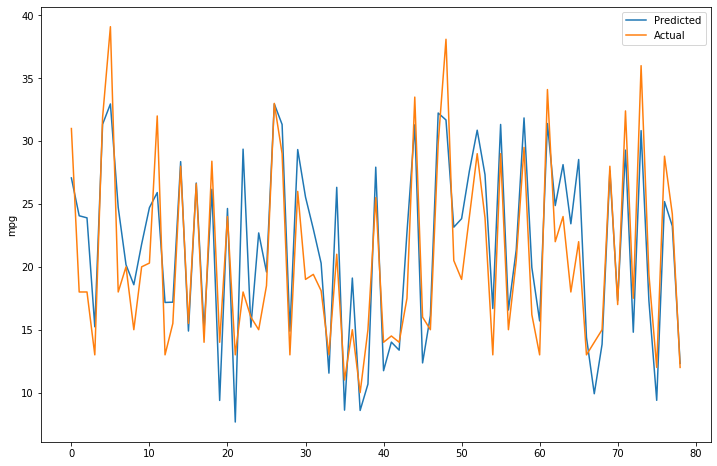

In [33]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                       'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

In [34]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6866836211757283
Test score 0.7046089053439712

Regression:  mpg ~ kitchen_sink_linear
Training score 0.6996084364725996
Test score 0.7327501935927385

Regression:  mpg ~ parsimonius_linear
Training score 0.6935420394527554
Test score 0.7411313218650326

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.6869714262562083
Test score 0.7401898077942348



In [35]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6805027893212368
Test_score :  0.7057103324023731


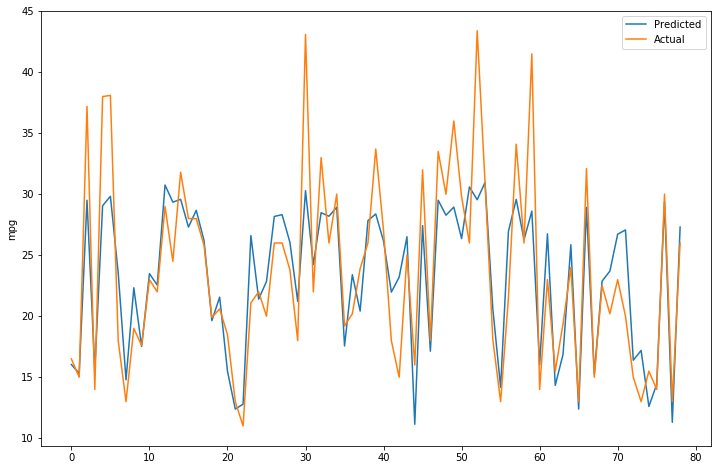

In [36]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                       'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

In [37]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6866836211757283
Test score 0.7046089053439712

Regression:  mpg ~ kitchen_sink_linear
Training score 0.6996084364725996
Test score 0.7327501935927385

Regression:  mpg ~ parsimonius_linear
Training score 0.6935420394527554
Test score 0.7411313218650326

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.6869714262562083
Test score 0.7401898077942348

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6805027893212368
Test score 0.7057103324023731



In [38]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5,
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):
    
    print("Equivalent to: ", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                       normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    
    return model

Equivalent to:  OLS
Training_score :  0.7288012574365078
Test_score :  0.6154202345015636


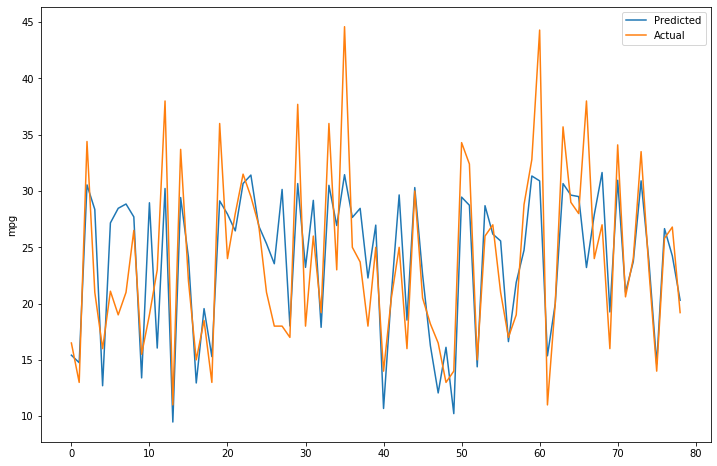

In [39]:
from functools import partial

result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg,
                                                                        alpha=0, equivalent_to='OLS'),
                                                       'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

Equivalent to:  OLS
Training_score :  0.7019300771751147
Test_score :  0.7200874036863166


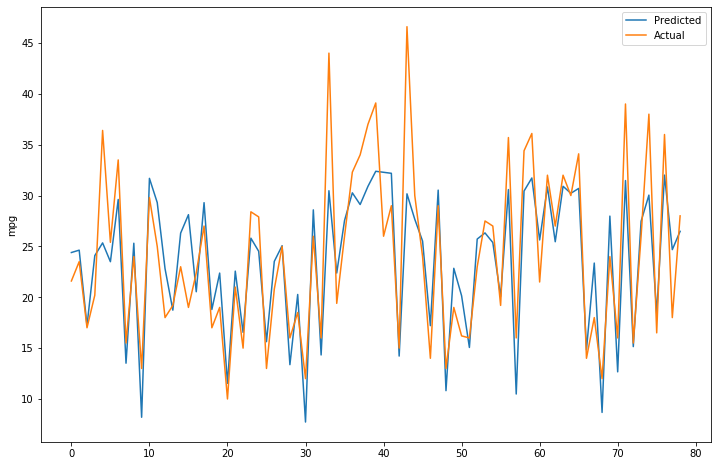

In [40]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg,
                                                                    l1_ratio=1, equivalent_to='Lasso'),
                                                       'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

Equivalent to:  Ridge
Training_score :  0.7170379261076559
Test_score :  0.6591598877077434


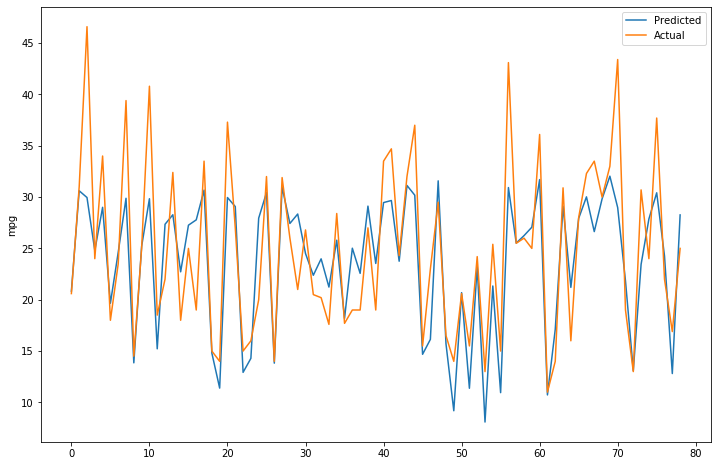

In [42]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg,
                                                                    l1_ratio=0, equivalent_to='Ridge'),
                                                       'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

Equivalent to:  Elastic Net
Training_score :  0.7085312632392433
Test_score :  0.6955294865564335


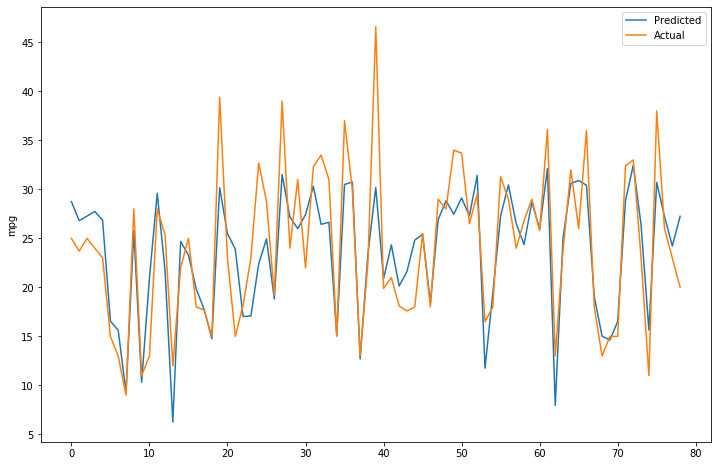

In [43]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1,  l1_ratio=0.5),
                                                                  'mpg',
                                                                  ['cylinders',
                                                                   'displacement',
                                                                   'horsepower',
                                                                   'weight',
                                                                   'acceleration'],
                                                                   automobile_df,
                                                                   show_plot_Y=True)                                                    

In [45]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6866836211757283
Test score 0.7046089053439712

Regression:  mpg ~ kitchen_sink_linear
Training score 0.6996084364725996
Test score 0.7327501935927385

Regression:  mpg ~ parsimonius_linear
Training score 0.6935420394527554
Test score 0.7411313218650326

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.6869714262562083
Test score 0.7401898077942348

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6805027893212368
Test score 0.7057103324023731

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7288012574365078
Test score 0.6154202345015636

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7019300771751147
Test score 0.7200874036863166

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7170379261076559
Test score 0.6591598877077434

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7085312632392433
Test score 0.6955294865564335



In [46]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6944147444824466
Test_score :  0.746544275231708


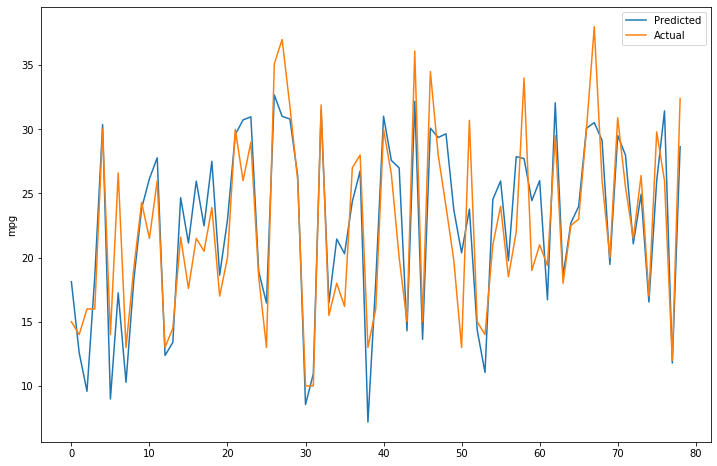

In [47]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                    'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)  
                                                                  

In [48]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6866836211757283
Test score 0.7046089053439712

Regression:  mpg ~ kitchen_sink_linear
Training score 0.6996084364725996
Test score 0.7327501935927385

Regression:  mpg ~ parsimonius_linear
Training score 0.6935420394527554
Test score 0.7411313218650326

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.6869714262562083
Test score 0.7401898077942348

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6805027893212368
Test score 0.7057103324023731

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7288012574365078
Test score 0.6154202345015636

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7019300771751147
Test score 0.7200874036863166

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7170379261076559
Test score 0.6591598877077434

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7085312632392433
Test score 0.6955294865564335

Regression:  mpg ~ kitchen_sink_svr
T

In [49]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7800305951672208
Test_score :  0.5772915430778365


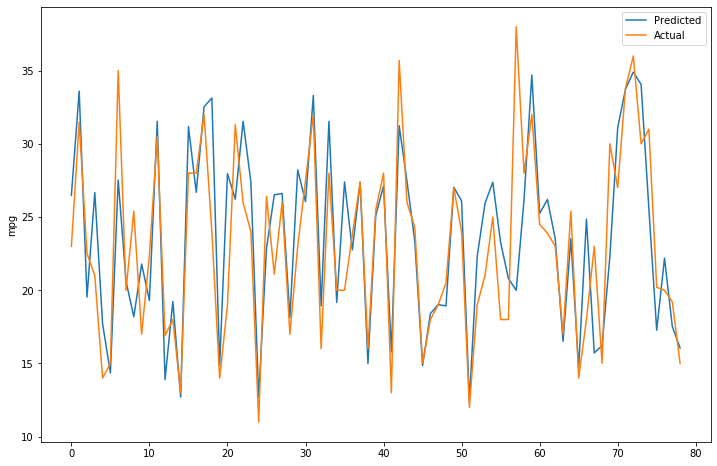

In [50]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                           'mpg',
                                                          ['cylinders',
                                                           'displacement',
                                                           'horsepower',
                                                           'weight',
                                                           'acceleration'],
                                                           automobile_df,
                                                           show_plot_Y=True)
                                                    

In [51]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6866836211757283
Test score 0.7046089053439712

Regression:  mpg ~ kitchen_sink_linear
Training score 0.6996084364725996
Test score 0.7327501935927385

Regression:  mpg ~ parsimonius_linear
Training score 0.6935420394527554
Test score 0.7411313218650326

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.6869714262562083
Test score 0.7401898077942348

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6805027893212368
Test score 0.7057103324023731

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7288012574365078
Test score 0.6154202345015636

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7019300771751147
Test score 0.7200874036863166

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7170379261076559
Test score 0.6591598877077434

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7085312632392433
Test score 0.6955294865564335

Regression:  mpg ~ kitchen_sink_svr
T

In [59]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [60]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6956600190246907
Test_score :  0.7258008245569909


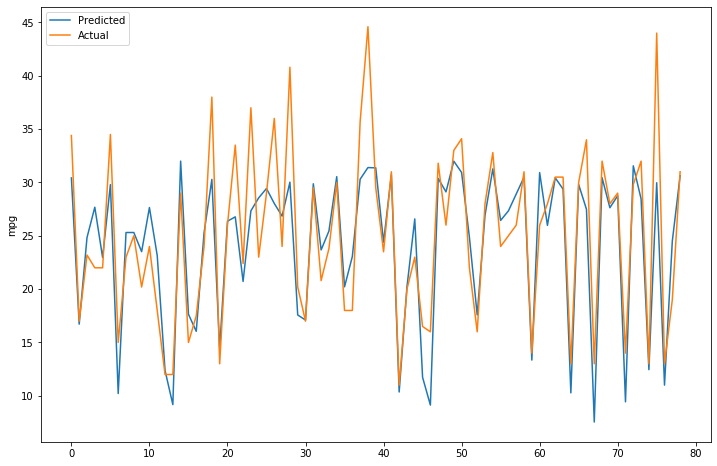

In [61]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    automobile_df,
                                                    show_plot_Y=True,
                                                    preprocess_fn=apply_standard_scaler)                                                    

In [62]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7504850950806775
Test_score :  0.6502578595303325


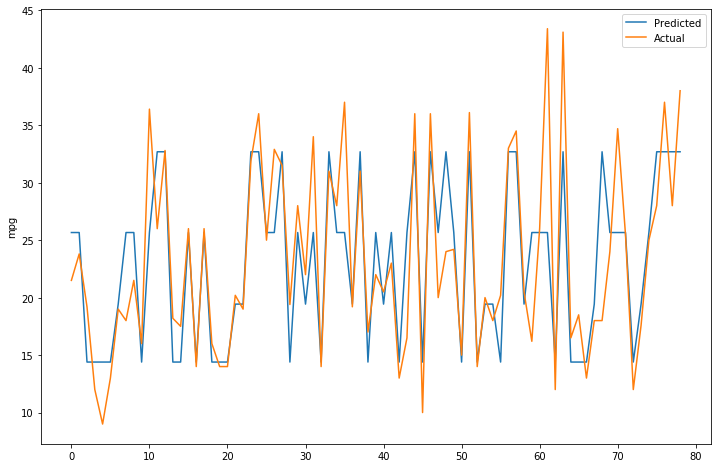

In [63]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                             'mpg',
                                                            ['cylinders',
                                                             'displacement',
                                                             'horsepower',
                                                             'weight',
                                                             'acceleration'],
                                                             automobile_df,
                                                             show_plot_Y=True)

In [64]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.730514989869022
Test_score :  0.7212575796334177


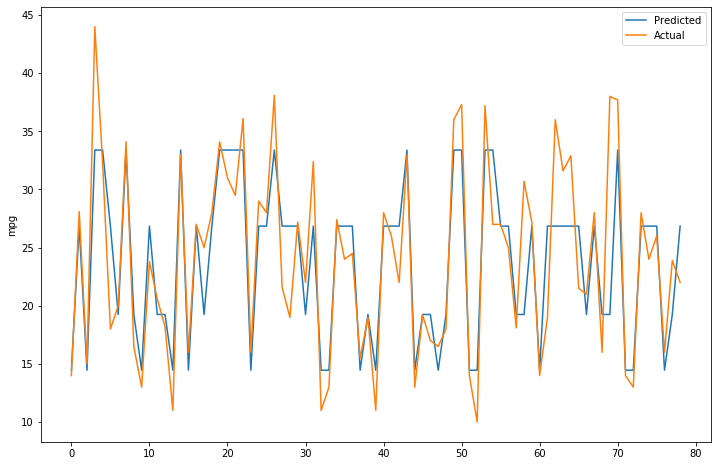

In [65]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(decision_tree_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    automobile_df,
                                                    show_plot_Y=True)

In [66]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6866836211757283
Test score 0.7046089053439712

Regression:  mpg ~ kitchen_sink_linear
Training score 0.6996084364725996
Test score 0.7327501935927385

Regression:  mpg ~ parsimonius_linear
Training score 0.6935420394527554
Test score 0.7411313218650326

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.6869714262562083
Test score 0.7401898077942348

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6805027893212368
Test score 0.7057103324023731

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7288012574365078
Test score 0.6154202345015636

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7019300771751147
Test score 0.7200874036863166

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7170379261076559
Test score 0.6591598877077434

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7085312632392433
Test score 0.6955294865564335

Regression:  mpg ~ kitchen_sink_svr
T